In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from importlib import reload
import warnings
from env import get_db_url
warnings.simplefilter("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
query = '''SELECT * FROM logs LEFT JOIN cohorts ON cohorts.id=logs.cohort_id'''
url = get_db_url('curriculum_logs')
df = pd.read_sql(query,url)

# Exercises
- file name: `time_series_anomaly_detection.py` or `time_series_anomaly_detection.ipynb`

The dataset for these exercises lives in the Codeup Data Science MySQL Server. The database name is curriculum_logs.

**Hint**: You will need to explore the database (yay SQL!)


In [16]:
df.program_id = df.program_id.astype('object')
df.loc[df.program_id == '1.0','program_id'] = 'WebDev'
df.loc[df.program_id == '2.0', 'program_id'] = 'Cloud Admin'
df.loc[(df.program_id == '3.0') | (df.program_id == '4.0'),'program_id'] = 'Data Science'
df.head().T

,0,1,2,3,4
date,2018-01-26,2018-01-26,2018-01-26,2018-01-26,2018-01-26
time,09:55:03,09:56:02,09:56:05,09:56:06,09:56:24
path,/,java-ii,java-ii/object-oriented-programming,slides/object_oriented_programming,javascript-i/conditionals
user_id,1,1,1,1,2
cohort_id,8.0,8.0,8.0,8.0,22.0
ip,97.105.19.61,97.105.19.61,97.105.19.61,97.105.19.61,97.105.19.61
id,8.0,8.0,8.0,8.0,22.0
name,Hampton,Hampton,Hampton,Hampton,Teddy
slack,#hampton,#hampton,#hampton,#hampton,#teddy
start_date,2015-09-22,2015-09-22,2015-09-22,2015-09-22,2018-01-08


In [21]:
df[df.id == 28].groupby('user_id').count()

,date,time,path,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
user_id,,,,,,,,,,,,,,
1,5787,5787,5787,5787,5787,5787,5787,5787,5787,5787,5787,5787,0,5787
11,15178,15178,15178,15178,15178,15178,15178,15178,15178,15178,15178,15178,0,15178
37,374,374,374,374,374,374,374,374,374,374,374,374,0,374
40,66,66,66,66,66,66,66,66,66,66,66,66,0,66
41,204,204,204,204,204,204,204,204,204,204,204,204,0,204
53,4132,4132,4132,4132,4132,4132,4132,4132,4132,4132,4132,4132,0,4132
64,12530,12530,12530,12530,12530,12530,12530,12530,12530,12530,12530,12530,0,12530
146,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,1216,0,1216
148,26,26,26,26,26,26,26,26,26,26,26,26,0,26



1. Label students by the program they are in.


1. Is it possible to identify the user_id of a staff member?


1. Identify students who are accessing our curriculum pages beyond the end of their time at Codeup.


In [29]:
df.date = pd.to_datetime(df.date)
df.start_date = pd.to_datetime(df.start_date)
df.end_date = pd.to_datetime(df.end_date)
df.created_at = pd.to_datetime(df.created_at)
df.updated_at = pd.to_datetime(df.updated_at)
df.deleted_at = pd.to_datetime(df.deleted_at)

In [32]:
accessed = df[df.end_date < df.date].user_id.unique()
df[df.user_id.isin(accessed)]

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaT,WebDev
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaT,WebDev
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaT,WebDev
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaT,WebDev
6,2018-01-26,09:56:46,javascript-i/conditionals,3,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaT,Cloud Admin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900218,2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaT,Cloud Admin
900219,2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaT,Cloud Admin
900220,2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaT,Cloud Admin
900221,2021-04-21,16:44:37,anomaly-detection/discrete-probabilistic-methods,744,28.0,24.160.137.86,28.0,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,NaT,Cloud Admin


1. Identify students who present anomalous activity using the Bollinger Band method, but reduce K to 2. 


<AxesSubplot: xlabel='date'>

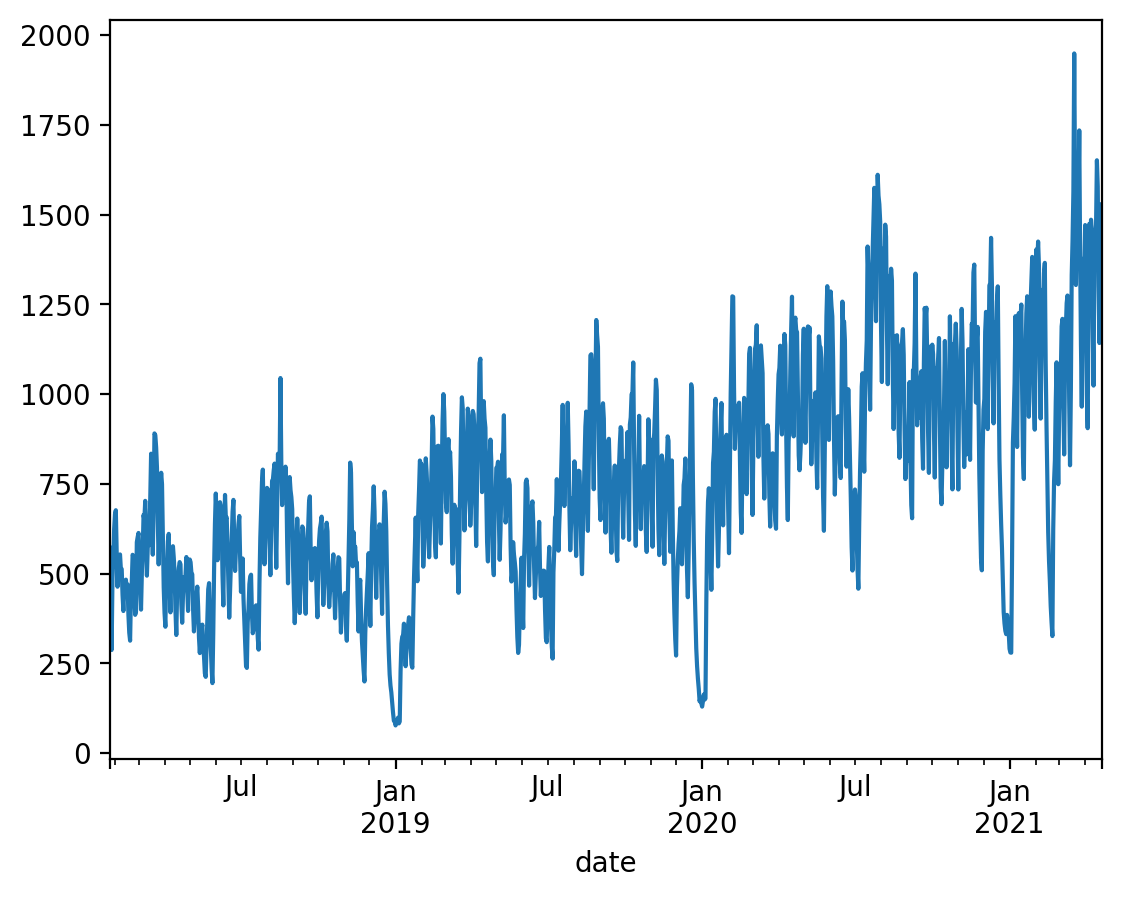

In [45]:
df = df.set_index(df.date)
users = df.resample('d').user_id.count()
users_7 = users.ewm(span=7).mean()
users_14 = users.ewn(span=14).mean()


1. Plot the access activity of these students.

**BONUS:** Can you identify users who are viewing both the web dev and data science curriculum?